# Coffee Vending Machine Sales Analysis

## Goal
This project aims to identify what are the factors that influence the sales of a coffee vending machine. This project is expected to provide insights to coffee vending machine companies that can help in making decisions regarding what products to push, what products to improve, and how to allocate their products to maximize revenue.


## Setup

### Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading Dataset

In [33]:
df = pd.read_csv(r"C:\Users\User\Documents\Project Coffee Sales\Coffee Sales Dataset.csv")

In [35]:
df

,date,datetime,cash_type,card,money,coffee_name
0,3/1/2024,03/01/2024 10:15:51 AM,card,ANON-0000-0000-0001,38.70,Latte
1,3/1/2024,03/01/2024 12:19:23 PM,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,3/1/2024,03/01/2024 12:20:18 PM,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,3/1/2024,03/01/2024 01:46:33 PM,card,ANON-0000-0000-0003,28.90,Americano
4,3/1/2024,03/01/2024 01:48:15 PM,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1648,9/22/2024,09/22/2024 09:08:15 PM,card,ANON-0000-0000-0655,27.92,Americano with Milk
1649,9/22/2024,09/22/2024 09:54:04 PM,card,ANON-0000-0000-0637,32.82,Hot Chocolate
1650,9/22/2024,09/22/2024 09:54:54 PM,card,ANON-0000-0000-0637,32.82,Hot Chocolate
1651,9/22/2024,09/22/2024 10:37:02 PM,card,ANON-0000-0000-0656,23.02,Americano


## Data Cleaning

### Check Duplicates & Missing Values

In [25]:
# Check for duplicates and missing data

duplicates = df.duplicated()
duplicates_count = duplicates.sum()
print(f'duplicates count = {duplicates_count}')

for col in df.columns:
    missing_data = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing_data))

duplicates count = 0
date - 0.0%
datetime - 0.0%
cash_type - 0.0%
card - 0.05384150030248034%
money - 0.0%
coffee_name - 0.0%


### Remove Duplicates & Missing Values

In [27]:
# Remove missing data and duplicates

df = df.dropna()
df = df.drop_duplicates()

# Re-check for duplicates and missing data

duplicates = df.duplicated()
duplicates_count = duplicates.sum()
print(f'duplicates count = {duplicates_count}')

for col in df.columns:
    missing_data = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing_data))

duplicates count = 0
date - 0.0%
datetime - 0.0%
cash_type - 0.0%
card - 0.0%
money - 0.0%
coffee_name - 0.0%


### Check Data Types

In [31]:
# Check data types

df.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

In [144]:
# Changing datatype

df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

df['time'] = df['datetime'].dt.time     # to show the time of the transaction
df['day'] = df['datetime'].dt.day_name()     # to show the day of the transaction
df['month'] = df['datetime'].dt.month     # to show the month of the transaction

In [146]:
df

,date,datetime,cash_type,card,money,coffee_name,time,day,month
0,2024-03-01,2024-03-01 10:15:51,card,ANON-0000-0000-0001,38.70,Latte,10:15:51,Friday,3
1,2024-03-01,2024-03-01 12:19:23,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:19:23,Friday,3
2,2024-03-01,2024-03-01 12:20:18,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12:20:18,Friday,3
3,2024-03-01,2024-03-01 13:46:33,card,ANON-0000-0000-0003,28.90,Americano,13:46:33,Friday,3
4,2024-03-01,2024-03-01 13:48:15,card,ANON-0000-0000-0004,38.70,Latte,13:48:15,Friday,3
...,...,...,...,...,...,...,...,...,...
1648,2024-09-22,2024-09-22 21:08:15,card,ANON-0000-0000-0655,27.92,Americano with Milk,21:08:15,Sunday,9
1649,2024-09-22,2024-09-22 21:54:04,card,ANON-0000-0000-0637,32.82,Hot Chocolate,21:54:04,Sunday,9
1650,2024-09-22,2024-09-22 21:54:54,card,ANON-0000-0000-0637,32.82,Hot Chocolate,21:54:54,Sunday,9
1651,2024-09-22,2024-09-22 22:37:02,card,ANON-0000-0000-0656,23.02,Americano,22:37:02,Sunday,9


## Data Exploration

### Which month had the most total sales?

In [152]:
# Group sales by month
monthly_sales = df.groupby('month').size().reset_index(name='sales')

all_months = pd.DataFrame({'month': range(3, 10)})
monthly_sales = pd.merge(all_months, monthly_sales, on='month', how='left')
monthly_sales['sales'] = monthly_sales['sales'].astype(int)

print(monthly_sales)

   month  sales
0      3    175
1      4    168
2      5    241
3      6    223
4      7    237
5      8    272
6      9    248


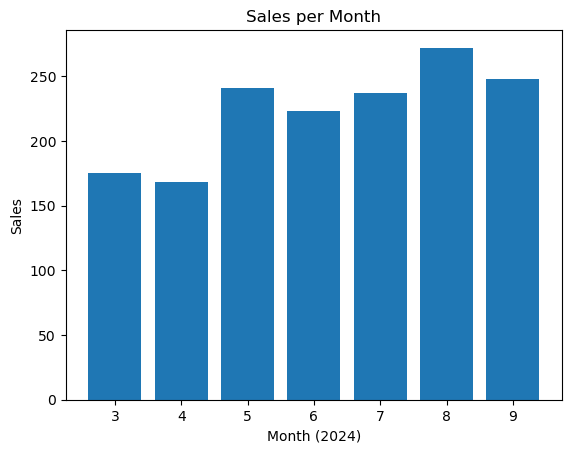

In [160]:
plt.bar(monthly_sales['month'], monthly_sales['sales'])
plt.xticks(monthly_sales['month']) 
plt.title('Sales per Month')
plt.xlabel('Month (2024)')
plt.ylabel('Sales')
plt.show()

The month with the most total sales was **August** with 272 products sold.

### Which day of the week had the most total sales?

In [158]:
# Group sales by day
daily_sales = df.groupby('day').size().reset_index(name='sales')

all_days = pd.DataFrame({'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']})
daily_sales = pd.merge(all_days, daily_sales, on='day', how='left')
daily_sales['sales'] = daily_sales['sales'].astype(int)

print(daily_sales)

         day  sales
0     Monday    211
1    Tuesday    257
2  Wednesday    211
3   Thursday    230
4     Friday    208
5   Saturday    228
6     Sunday    219


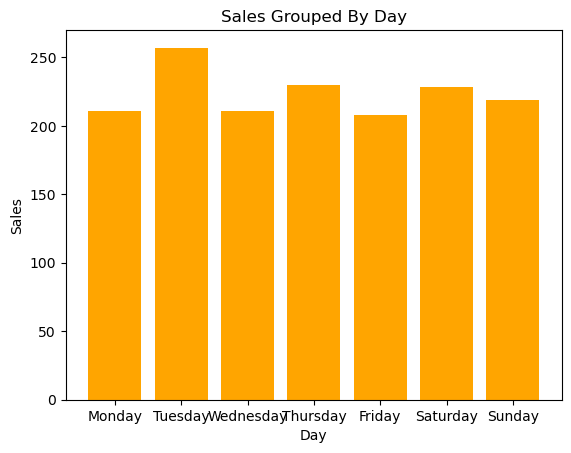

In [168]:
plt.bar(daily_sales['day'], daily_sales['sales'], color='orange')
plt.xticks(daily_sales['day'])
plt.title('Sales Grouped By Day')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()

The day with the most total sales was **Tuesday** with 257 products sold.

### What hour had the most total sales?

In [182]:
# Group sales by time
hourly_sales = df.groupby('hour').size().reset_index(name='sales')

all_hours = pd.DataFrame({'hour': range(0,25)})
hourly_sales = pd.merge(all_hours, hourly_sales, on='hour', how='left'). fillna(0)
hourly_sales['sales'] = hourly_sales['sales'].astype(int)

print(hourly_sales)

    hour  sales
0      0      0
1      1      0
2      2      0
3      3      0
4      4      0
5      5      0
6      6      0
7      7     23
8      8    100
9      9     98
10    10    151
11    11    147
12    12    118
13    13    102
14    14     91
15    15     86
16    16     95
17    17     91
18    18     96
19    19    119
20    20     90
21    21    110
22    22     47
23    23      0
24    24      0


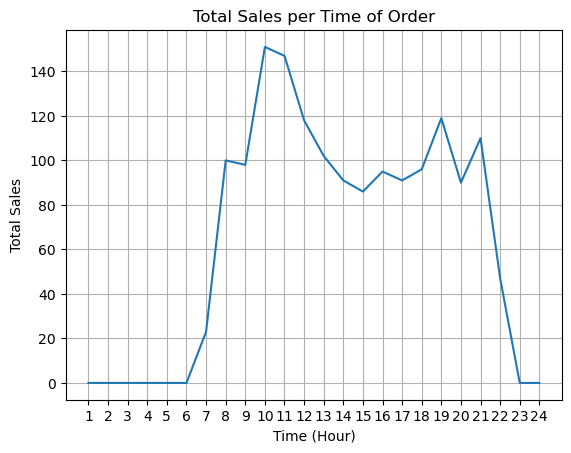

In [240]:
plt.clf()

plt.plot(hourly_sales['hour'], hourly_sales['sales'])
plt.xticks(range(1, 25))
plt.title('Total Sales per Time of Order')
plt.xlabel('Time (Hour)')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

The hour with the most total sales was **10 AM** with 151 products sold.

### Which product was ordered the most?

In [248]:
coffee_name = df['coffee_name'].unique()

products_sold = df.groupby('coffee_name').size().reset_index(name='sales')
all_products = pd.DataFrame({'coffee_name': coffee_name})
products_sold = pd.merge(all_products, products_sold, on='coffee_name', how='left')
products_sold = products_sold[['coffee_name', 'sales']] 
products_sold['sales'] = products_sold['sales'].astype(int) 

print(products_sold)

           coffee_name  sales
0                Latte    345
1        Hot Chocolate     82
2            Americano    217
3  Americano with Milk    398
4                Cocoa     50
5              Cortado    164
6             Espresso     69
7           Cappuccino    239


### Which product was ordered repeatedly the most?

In [322]:
# Count repeat orders

repeat_orders = df.groupby(['card', 'coffee_name']).size().reset_index(name='repeat_order_count')
repeat_orders = repeat_orders[repeat_orders['repeat_order_count'] > 1]
repeat_order_summary = repeat_orders.groupby('coffee_name')['repeat_order_count'].sum().reset_index()

print(repeat_order_summary)

           coffee_name  repeat_order_count
0            Americano                 141
1  Americano with Milk                 255
2           Cappuccino                 120
3                Cocoa                  19
4              Cortado                 111
5             Espresso                  29
6        Hot Chocolate                  30
7                Latte                 187


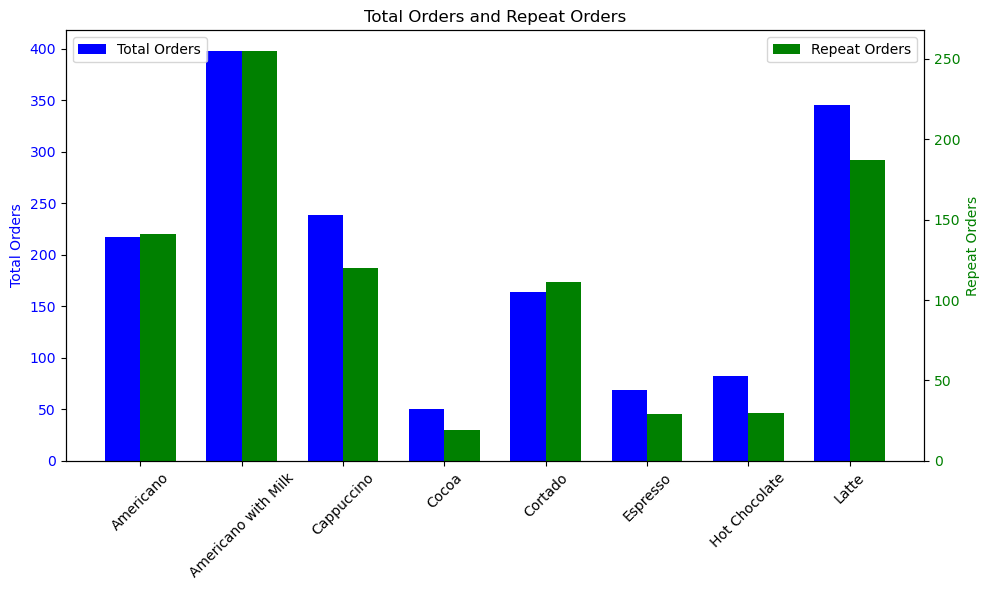

In [382]:
data = pd.DataFrame({
    'coffee_name': products_sold['coffee_name'],
    'amt_orders': products_sold['sales'],
    'amt_repeat_orders': repeat_order_summary['repeat_order_count']
})
data_sorted = data.sort_values(by='coffee_name')

coffee_name = data_sorted['coffee_name'].values

fig, ax1 = plt.subplots(figsize=(10, 6))
x = np.arange(len(coffee_name))
width = 0.35

# Left y-axis
bars1 = ax1.bar(x - width/2, amt_orders, width, label='Total Orders', color='b')
ax1.set_ylabel('Total Orders', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Right y-axis
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, amt_repeat_orders, width, label='Repeat Orders', color='g')
ax2.set_ylabel('Repeat Orders', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# x-axis
ax1.set_xticks(x)
ax1.set_xticklabels(coffee_name, rotation=45)

# Add title and legend
plt.title('Total Orders and Repeat Orders')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

The product which has the highest number of orders and repeat orders is **Americano with Milk**.

### Which product generated the most revenue?

In [374]:
# Count Total Revenue for each product

revenue = df.groupby('coffee_name')['money'].sum().reset_index()
revenue.columns = ['coffee_name', 'total_revenue']

print(revenue)

           coffee_name  total_revenue
0            Americano        5659.78
1  Americano with Milk       12132.34
2           Cappuccino        8641.70
3                Cocoa        1762.52
4              Cortado        4206.48
5             Espresso        1429.62
6        Hot Chocolate        2998.96
7                Latte       12186.28


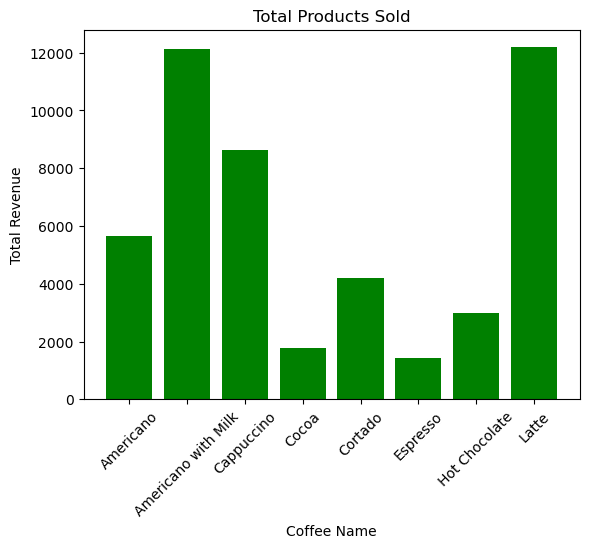

In [320]:
plt.bar(revenue['coffee_name'], revenue['total_revenue'], color='green')
plt.xticks(revenue['coffee_name'], rotation=45)
plt.title('Total Products Sold')
plt.xlabel('Coffee Name')
plt.ylabel('Total Revenue')
plt.show()

The product that generated the most revenue is **Americano with Milk**.


## Insights
- The month with the most total sales was **August** with 272 products sold. This could be due to back-to-school season or end of summer holidays where people return to work which increases the demand for coffee, especially around school areas. 
- The day with the most total sales was **Tuesday** with 257 products sold. This could be due to people being extra tired after Monday, which is the first workday after a weekend break. Saturday and Sunday also had quite a high number of sales, possibly because people tend to grab coffee with friends while hanging out on the weekend.
- The hour with the most total sales was **10 AM** with 151 products sold. This could be caused by people starting to get drowsy as lunch time approaches, which increases the demand for coffee. Sales experienced another spike at night, around 7 PM, possibly because the caffeine from the morning or afternoon has worn off although they still need to work.
- The product which has the highest number of orders and repeat orders is **Americano with Milk**. This indicates that customers who bought Americano with Milk liked it, which could be due to the taste, price, etc. On the other hand, Cappuccino is moderately popular but not many people bought it for the second time, which means that it needs improvement.
- The product that generated the most revenue is **Americano with Milk**. Most of the top products with the most sales generated the most revenue as well, since sales and revenue has a strong correlation. However, unlike the other products, Cocoa generated more revenue than Espresso, although it sold less than Espresso.
 

## Recommendations
- Coffee vending machine companies can provide more stock during end-of-holiday periods, such as August and September.
- More vending machines can be placed around school or area, as well as public open spaces where people tend to hang out with friends.
- Coffee needs to be fully stocked up before 10 AM to prevent insufficient stock. Time-limited discounts are also recommended during the peak hours to maximize sales, such as 'Morning Wake-Up Promo' from 10 AM until 12 PM, or 'Evening Boost' from 7 PM until 9 PM.
- Company can conduct a survey about what customers like about Americano with Milk and apply the gained knowledge to adjust other products with less repeat orders such as Cappuccino. Other than that, discounts can be made for less popular products such as Cocoa and Hot Chocolate.
- Since Cocoa unexpectedly generated more revenue with less sales, company can create marketing strategies focused on Cocoa to maximize revenue.